# Madden-Jullian Oscillation Notebook
### _Jonathan Jurgens and Scott Burgholzer_

#### Powerpoint Link: https://niuits-my.sharepoint.com/:p:/g/personal/z1780747_students_niu_edu/EaJsDCGoYPJEiyaLfgbcaFoBFs-IcOFjtbZZsJATVt6rdg?e=QWraTr
***

### Import necessary libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, IntSlider
from IPython.display import clear_output, display, HTML
from IPython.display import Image
from IPython.core.display import HTML
import io
import requests
from matplotlib.collections import LineCollection

***
#### Get the data from BOM http://www.bom.gov.au/climate/mjo/#tabs=MJO-phase 
#### Get creative to allow us to get the file from the url..

In [4]:
url = 'http://www.bom.gov.au/climate/mjo/graphics/rmm.74toRealtime.txt'
session = requests.Session()
response = session.get(url, headers={'User-Agent': 'Mozilla/5.0'})
data = response.text
buffer = io.StringIO(data)
df = pd.read_csv(buffer, sep=r'\s+', header=None, skiprows=2,
    usecols=[0,1,2,3,4,5,6,7], names=['year', 'month', 'day','RMM1','RMM2', 'phase', 'amplitude', 'origin'])
# For the interactive part, create a new column called date
# and concatanate all year month and day columns to
# year-month-day. This uses python lambda function
df['date'] = df[df.columns[0:3]].apply(
    lambda x: '-'.join(x.dropna().astype(str)),
    axis=1
)
df.dtypes

year           int64
month          int64
day            int64
RMM1         float64
RMM2         float64
phase          int64
amplitude    float64
origin        object
date          object
dtype: object

***
#### Plot the phase diagram

In [5]:
# function to plot the data
def mjo_plot(year, month, day):
    # this just to prevent us from missing a refrence to the variable
    data = df
    
    # get the passed in year, month and day as a formatted string
    # to use to get the indexes we want
    strdate = str(year) + "-" + str(month) + "-" + str(day)
    
    # we are using this as an end index, so find it in the dataframe
    endindex = list(np.where(df["date"] == strdate)[0])[0]+1
    # find the start index
    startindex = endindex - 40
    # prevent data from having negative indexes
    if endindex < 40:
        print("Selected a date that does not have 40 days previous data")
        return
 
    # get the sub-dataframe
    data = data[startindex:endindex]
    
    f, ax = plt.subplots(figsize=(10, 10))
    # get the middle circle
    circle = np.linspace(0,2*np.pi)
    x0 = np.cos(circle)
    y0 = np.sin(circle)
    
    # assign the axis limits
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    
    # label the axies
    plt.xlabel("RMM1")
    plt.ylabel("RMM2")
    
    # plot the circle
    ax.plot(x0,y0, linestyle='-', color='k',label='MJO threshold')
    ax.fill(x0, y0, "w", zorder=10)  
    
    # plot the first two lines to divide the plot into phases
    ax.axhline(0, color='black', linestyle="--", zorder=9)
    ax.axvline(0, color='black', linestyle='--', zorder=9)
    # plot the next two lines to divide the plot into phases
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle="--", color="black", zorder=9)
    ax.plot([4,-4],[-4,4], linestyle="--", color="black", zorder=9)

    # title the plot
    plt.title("(RMM1,RMM2) phase space for " 
          + str(data.iloc[0].day) + "-" + str(data.iloc[0].month) + "-" + str(data.iloc[0].year)
          + " to " +
          str(data.iloc[-1].day) + "-" + str(data.iloc[-1].month) + "-" + str(data.iloc[-1].year))
    
    # add a start and stop text
    plt.text(data.iloc[0].RMM1, data.iloc[0].RMM2, 'START', zorder=11)
    plt.text(data.iloc[-1].RMM1,data.iloc[-1].RMM2, 'END', zorder=11)
    
    # label the phases
    plt.text(-3.5, -1.5, '1')
    plt.text(-1.5, -3.5, '2')
    plt.text(1.5, -3.5, '3')
    plt.text(3.5, -1.5, '4')
    plt.text(3.5, 1.5, '5')
    plt.text(1.5, 3.5, '6')
    plt.text(-1.5, 3.5, '7')
    plt.text(-3.5, 1.5, '8')
    
    # label the areas
    plt.text(-.46, -3.9, 'Indian Ocean')
    plt.text(3.8, -.7, 'Maritime Continent',rotation=-90)
    plt.text(-.6, 3.8, 'Western Pacific')
    plt.text(-3.8, -.5, 'W Hemi and Africa',rotation=90)
    
    # now the actual data
    ax.plot(data["RMM1"], data["RMM2"], zorder=11)
    plt.show()

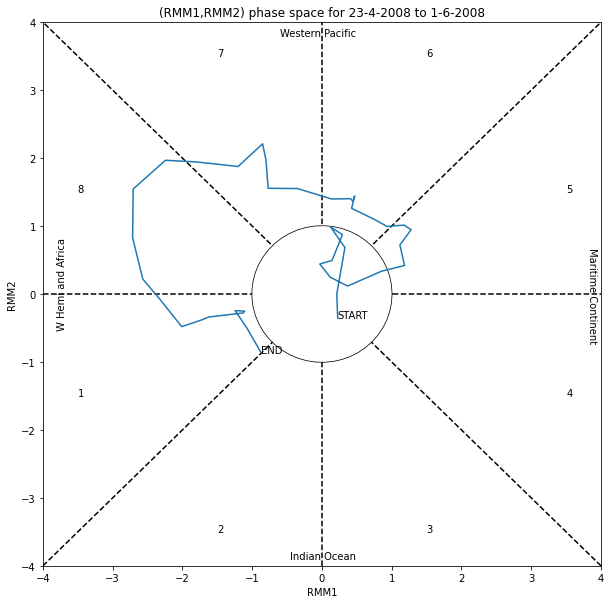

In [6]:
plot = mjo_plot(year=2008, month=6, day=1)

In [7]:
#ans = interactive(mjo_plot, year=(1974,int(df.iloc[-1].year)), month=(1,12), day=(1,31))
ans = interactive(mjo_plot, 
                  year=IntSlider(min=1974, max=int(df.iloc[-1].year), value=int(df.iloc[-1].year), step=1), 
                  month=IntSlider(min=1, max=12, value=int(df.iloc[-1].month), step=1),
                  day=IntSlider(min=1, max=31, value=int(df.iloc[-1].day), step=1))

display(ans)

interactive(children=(IntSlider(value=2022, description='year', max=2022, min=1974), IntSlider(value=3, descri…

In [27]:
Image(url= "https://github.com/sburgholzer/GEOG790_MJO/blob/main/img/MJO-fig1-2.png?raw=true")